# Importing Libraries

In [1]:
# Import libraries
!pip install pytesseract
!pip install tesseract
!apt install tesseract-ocr
import pytesseract
import cv2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Receipt 1

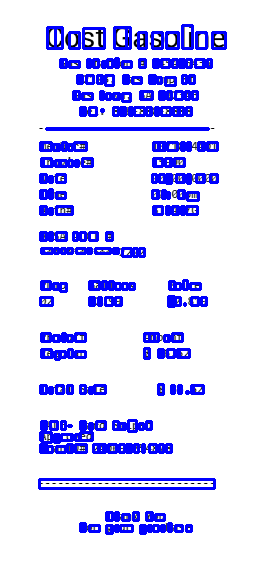

In [2]:
from google.colab.patches import cv2_imshow
receipt1 = cv2.imread('/content/gdrive/My Drive/Computer Vision/Receipt1.jpg')
original1 = cv2.imread('/content/gdrive/My Drive/Computer Vision/Receipt1.jpg')
# Adding custom options
custom_config = r'--oem 3 --psm 6'
#Find out more about these options in the Tesseract documentation at https://tesseract-ocr.github.io/tessdoc/

h, w, c = receipt1.shape
boxes = pytesseract.image_to_boxes(receipt1) 
for b in boxes.splitlines():
    b = b.split(' ')
    receipt1 = cv2.rectangle(receipt1, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2) #OpenCV is in Blue, Green, Red format.

cv2_imshow(receipt1)

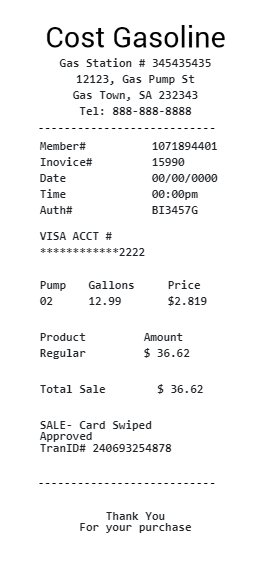

In [3]:
cv2_imshow(original1)

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
outputnopre = str(pytesseract.image_to_string(original1)) 
print(outputnopre)

Cost Gasoline

Gas Station # 345435435,
12123, Gas Pump St
Gas Toun, SA 232343
Tel: 888-888-8888

 

Members s071894401
Inovicet 15990

Date 00/00/0000
Time 00:00pm
auth BI34576
VISA ACCT #

seeeeesese42292

Pump Gallons Price
2 12.99 $2.819
Product Amount
Regular $ 36.62
Total Sale $ 36.62

SALE- Card Swiped
Approved
TranID# 240693254878

 

Thank You
For your purchase



# Pre-Processing

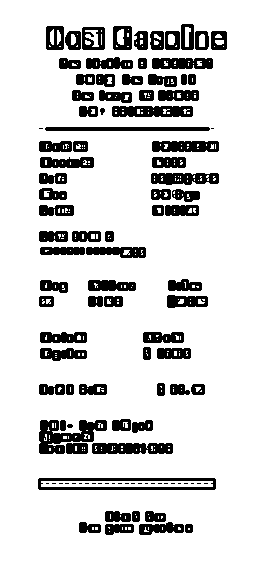

In [5]:
#Grayscale and Thresholding of Image
imggrayscale = cv2.cvtColor(original1,cv2.COLOR_BGR2GRAY)
ret, receipt1grayotsu = cv2.threshold(imggrayscale,0,255,cv2.THRESH_OTSU)
outputreceipt1grayotsu = str(pytesseract.image_to_string(receipt1grayotsu)) 

h, w = receipt1grayotsu.shape
boxes = pytesseract.image_to_boxes(receipt1grayotsu) 
for b in boxes.splitlines():
    b = b.split(' ')
    receipt1grayotsu = cv2.rectangle(receipt1grayotsu, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(receipt1grayotsu)

In [6]:
print(outputreceipt1grayotsu)

Cost Gasoline

Gas Station # 345435435,
12423, Gas Punp St
Gas Town, SA 232343
Tel: 888-888-3888

 

Member so71a94a01
Inovices 15998

Date 20/00/0000
Tine 0:00pm,
auth BI34576
VISA ACCT #

saeversee9497202

Punp Gallons Price
2 12.99 $2,819
Product Anount
Regular $ 36.62
Total Sale $ 36.62

SALE- Card Suiped
Approved
Tranio# 240695254878

 

Thank You
For your purchase



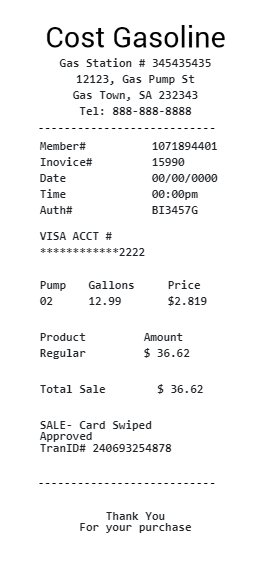

In [7]:
#Perform Erosion on Image
import numpy as np
kernel = np.ones((1,1),np.uint8)
erodedreceipt1 = cv2.erode(original1,kernel,iterations = 5) #The more iterations you have, the more erosion of the image.

cv2_imshow(erodedreceipt1)

In [8]:
outputerodedreceipt1 = str(pytesseract.image_to_string(erodedreceipt1))
print(outputerodedreceipt1)

Cost Gasoline

Gas Station # 345435435,
12123, Gas Pump St
Gas Toun, SA 232343
Tel: 888-888-8888

 

Members s071894401
Inovicet 15990

Date 00/00/0000
Time 00:00pm
auth BI34576
VISA ACCT #

seeeeesese42292

Pump Gallons Price
2 12.99 $2.819
Product Amount
Regular $ 36.62
Total Sale $ 36.62

SALE- Card Swiped
Approved
TranID# 240693254878

 

Thank You
For your purchase



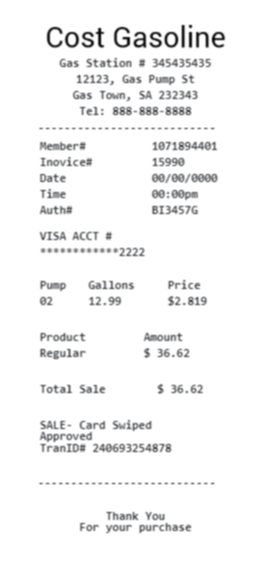

In [9]:
blurredreceipt1 = cv2.GaussianBlur(original1, (3,3), 0)
cv2_imshow(blurredreceipt1)

In [10]:
outputblurredreceipt1 = str(pytesseract.image_to_string(blurredreceipt1))
print(outputblurredreceipt1)

Cost Gasoline

Gas Station # 345435435
12123, Gas Pump St
Gas Town, SA 232343,
Tel: 888-888-8888

 

Menbers 1071894401
Inovices 15990

Date 00/00/0000
Time 00,
auth 8134576
VISA ACCT #

- 2222

 

Pump Gallons Price
2 12.99 $2.819

Product ‘Amount
Regular $ 36.62

 

Total Sale $36.62

SALE- Card Swiped
Approved
‘TranID# 240693254878

‘Thank You
For your purchase



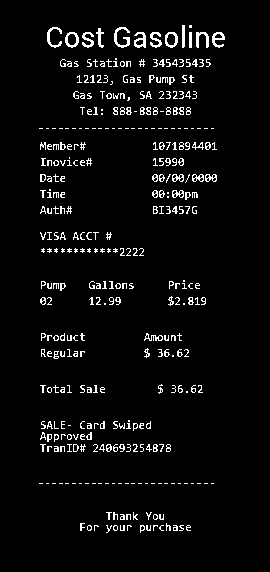

In [11]:
img1grayscale = cv2.cvtColor(original1,cv2.COLOR_BGR2GRAY)
ret, threshreceipt1 = cv2.threshold(img1grayscale,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(threshreceipt1)

In [12]:
outputthreshreceipt1 = str(pytesseract.image_to_string(threshreceipt1))
print(outputthreshreceipt1)

Cost Gasoline

rc Ereey
Frrre eats
Ce ere
Omer ce ty

 

Coad Pee
coed fed

coed Cee)
cid Cad
or BI34576
Dewees

perernarenery yr]

Cr ceed
Cte) poet
Poets Anount
potas Pens
cores Peo)

ee eer]
eer)
Ure ery

 

an
Cooney



# Evaluation - Receipt 1

In [13]:
from difflib import SequenceMatcher
import statistics
from tabulate import tabulate
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

accuracy=[]
accuracy.append(('No Pre', 'GrayOtsu', 'Erosion', 'Blur', 'InvThresh'))

groundtruth = open("/content/gdrive/My Drive/Computer Vision/Receipt1-GroundTruth.txt").read()

nopreprocessing = SequenceMatcher(None, groundtruth, outputnopre)
grayotsu = SequenceMatcher(None, groundtruth, outputreceipt1grayotsu)
erosionout = SequenceMatcher(None, groundtruth, outputerodedreceipt1)
blurout = SequenceMatcher(None, groundtruth, outputblurredreceipt1)
invthreshout = SequenceMatcher(None, groundtruth, outputthreshreceipt1)

accuracy.append((nopreprocessing.ratio(), grayotsu.ratio(), erosionout.ratio(), blurout.ratio(), invthreshout.ratio()))

print(tabulate(accuracy))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
------------------  ------------------  ------------------  ------------------  -------------------
No Pre              GrayOtsu            Erosion             Blur                InvThresh
0.8986666666666666  0.6986666666666667  0.8986666666666666  0.7795698924731183  0.08695652173913043
------------------  ------------------  ------------------  ------------------  -------------------


# Receipt 2

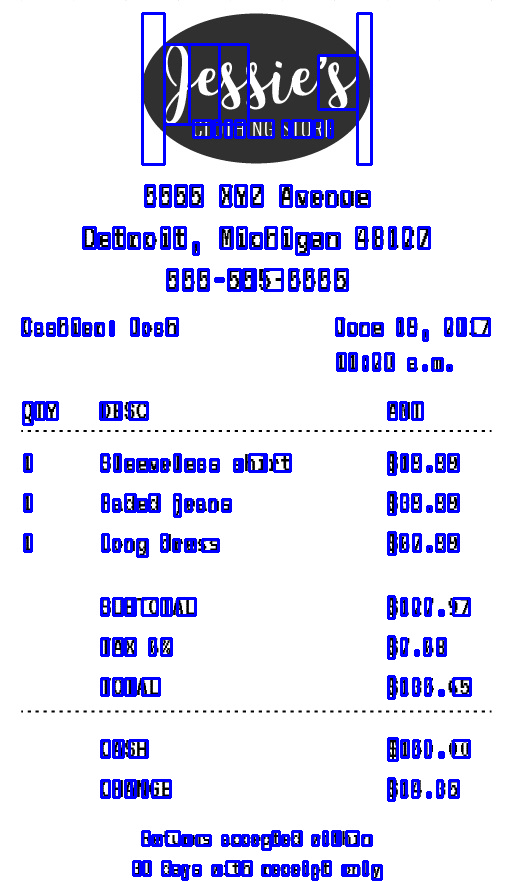

In [14]:
receipt2 = cv2.imread('/content/gdrive/My Drive/Computer Vision/Receipt2.jpg')
original2 = cv2.imread('/content/gdrive/My Drive/Computer Vision/Receipt2.jpg')

h, w, c = receipt2.shape
boxes = pytesseract.image_to_boxes(receipt2) 
for b in boxes.splitlines():
    b = b.split(' ')
    receipt2 = cv2.rectangle(receipt2, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2) #OpenCV is in Blue, Green, Red format.

cv2_imshow(receipt2)

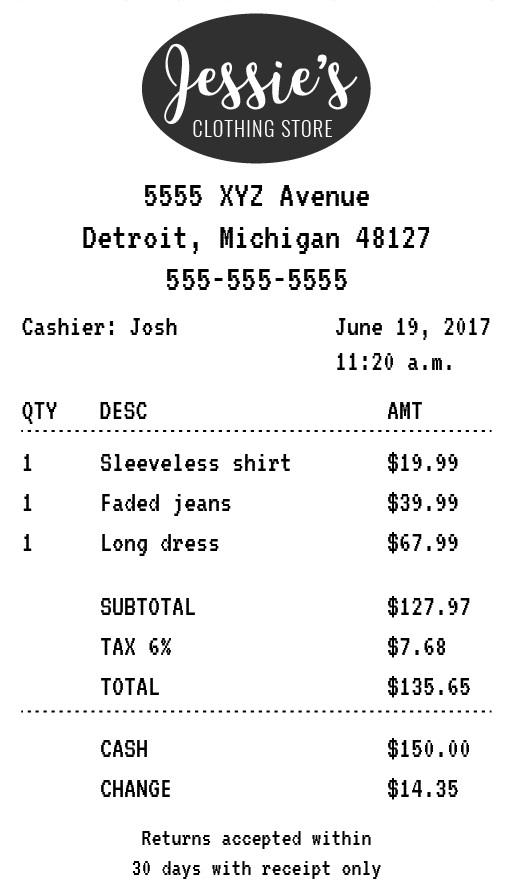

In [15]:
cv2_imshow(original2)

In [16]:
outputnopre2 = str(pytesseract.image_to_string(original2)) 
print(outputnopre2)

Veer

ROUT eRe tg

  

5555 XYZ Avenue
Detroit, Michigan 48127
555-555-5555

Cashier: Josh June 19, 2017
11:20 a.m.

QTY = DESC ANT

1 Sleeveless shirt $19.99

1 Faded jeans $39.99

1 Long dress $67.99
SUBTOTAL $127.97
TAX 6% $7.68
TOTAL $135.65
CASH $150.00
CHANGE $14.35

Returns accepted within
30 days with receipt only



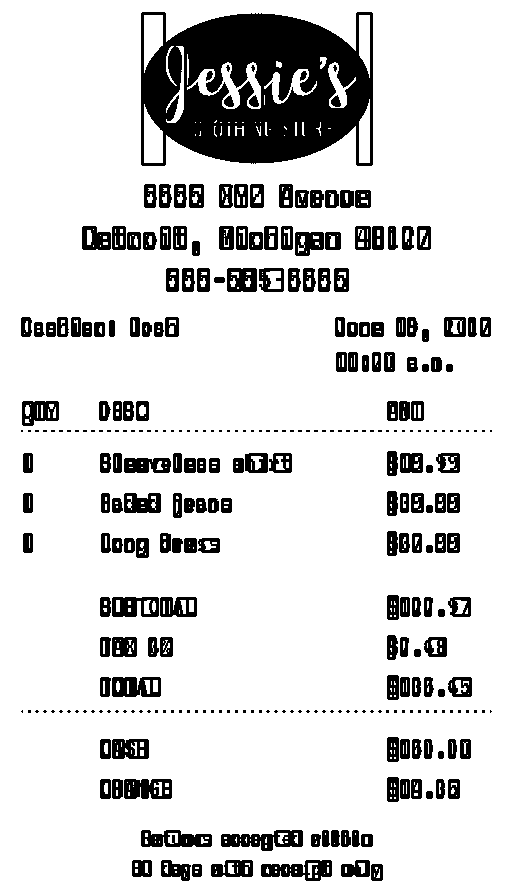

In [17]:
#Grayscale and Thresholding of Image
imggrayscale2 = cv2.cvtColor(original2,cv2.COLOR_BGR2GRAY)
ret, receipt2grayotsu = cv2.threshold(imggrayscale2,0,255,cv2.THRESH_OTSU)
outputreceipt2grayotsu = str(pytesseract.image_to_string(receipt2grayotsu)) 

h, w = receipt2grayotsu.shape
boxes = pytesseract.image_to_boxes(receipt2grayotsu) 
for b in boxes.splitlines():
    b = b.split(' ')
    receipt2grayotsu = cv2.rectangle(receipt2grayotsu, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(receipt2grayotsu)

In [18]:
print(outputreceipt2grayotsu)

Yeh

BROT eae] g

  

5555 XVZ Avenue
Detroit, Michigan 48127
555-555-5555

Cashier: Josh June 19, 2017
11:20 a.m.

QTY = DESC AMT

1 Sleeveless shirt $19.99

1 Faded jeans $35.99

1 Long dress $67.99
SUBTOTAL $127.97
TAX 6% $7.68
TOTAL $135.65
CASH $150.00
CHANGE $14.35

Returns accepted within
30 days with receipt only



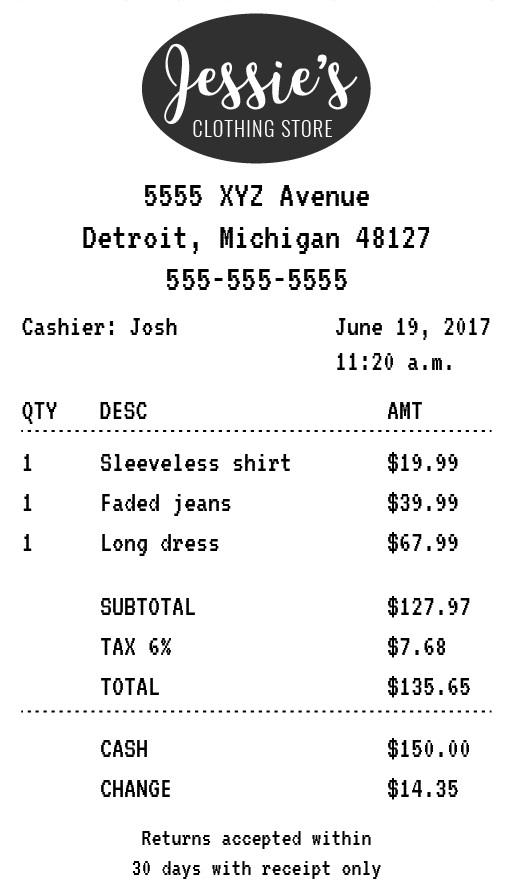

In [19]:
import numpy as np
kernel = np.ones((1,1),np.uint8)
erodedreceipt2 = cv2.erode(original2,kernel,iterations = 5) #The more iterations you have, the more erosion of the image.

cv2_imshow(erodedreceipt2)

In [20]:
outputerodedreceipt2 = str(pytesseract.image_to_string(erodedreceipt2))
print(outputerodedreceipt2)

Veer

ROUT eRe tg

  

5555 XYZ Avenue
Detroit, Michigan 48127
555-555-5555

Cashier: Josh June 19, 2017
11:20 a.m.

QTY = DESC ANT

1 Sleeveless shirt $19.99

1 Faded jeans $39.99

1 Long dress $67.99
SUBTOTAL $127.97
TAX 6% $7.68
TOTAL $135.65
CASH $150.00
CHANGE $14.35

Returns accepted within
30 days with receipt only



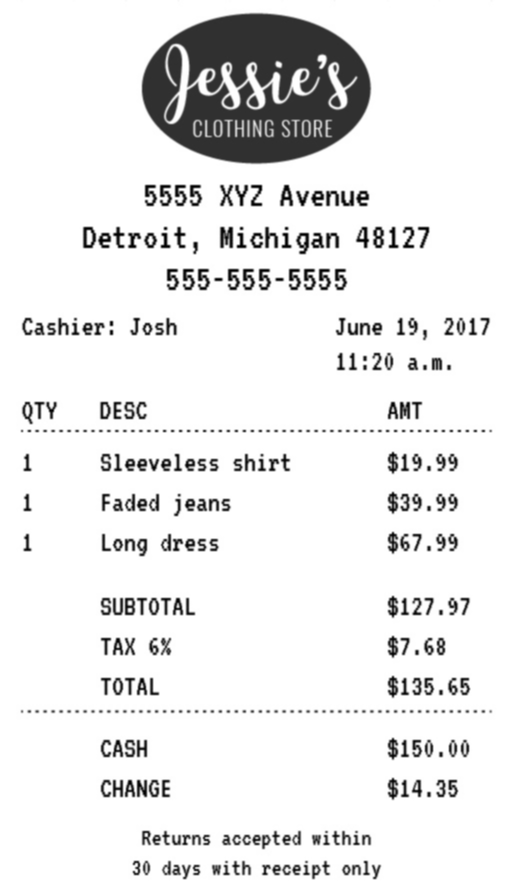

In [21]:
blurredreceipt2 = cv2.GaussianBlur(original2, (3,3), 0)
cv2_imshow(blurredreceipt2)

In [22]:
outputblurredreceipt2 = str(pytesseract.image_to_string(blurredreceipt2))
print(outputblurredreceipt2)

Vere

HAUL

  

5555 XYZ Avenue
Detroit, Michigan 48127
555-555-5555

Cashier: Josh June 19, 2017
11:20 a.m.

QTY DESC AMT

1 Sleeveless shirt $19.99

1 Faded jeans $39.99

1 Long dress $67.99
SUBTOTAL $127.97
TAX 6% $7.68
TOTAL $135.65
CASH $150.00
CHANGE $14.35

Returns accepted within
30 days with receipt only



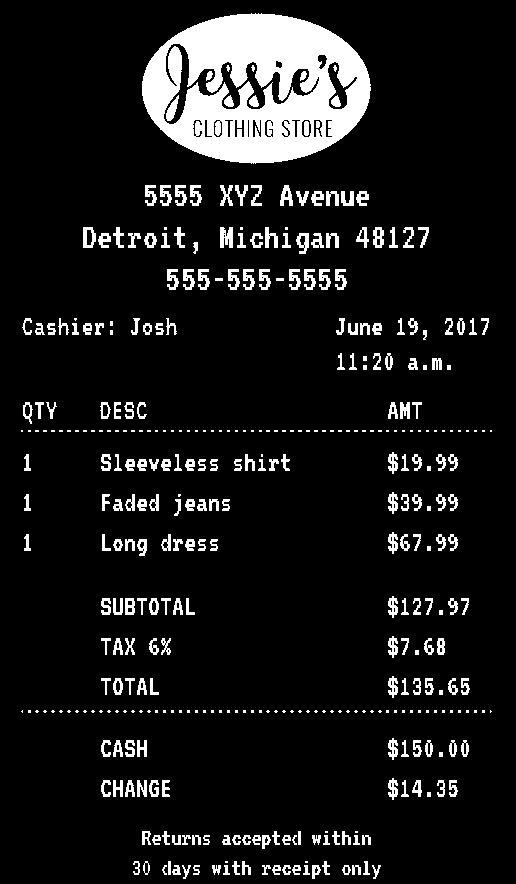

In [23]:
img2grayscale = cv2.cvtColor(original2,cv2.COLOR_BGR2GRAY)
ret, threshreceipt2 = cv2.threshold(img2grayscale,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(threshreceipt2)

In [24]:
outputthreshreceipt2 = str(pytesseract.image_to_string(threshreceipt2))
print(outputthreshreceipt2)

Jessie’y

CLOTHING STORE

  

5555 XVZ Avenue
ae ee eae
PLS bb Bhi L hy

Cashier: Josh Al rer ee
er D en

QTY = DESC fe

cf Cee ee ael pe a PE y)

cf me CEE Cee y)

cf Long dress $67.99
Et tee Y]
arya tv]
ae $135.65
eT $150.00
ruta $14.35

aa eae Cots em DAD
30 days with receipt only



# Evaluation - Receipt 2

In [25]:
accuracy2=[]
accuracy2.append(('No Pre', 'GrayOtsu', 'Erosion', 'Blur', 'InvThresh'))

groundtruth2 = open("/content/gdrive/My Drive/Computer Vision/Receipt2-GroundTruth.txt").read()

nopreprocessing2 = SequenceMatcher(None, groundtruth2, outputnopre2)
grayotsu2 = SequenceMatcher(None, groundtruth2, outputreceipt2grayotsu)
erosionout2 = SequenceMatcher(None, groundtruth2, outputerodedreceipt2)
blurout2 = SequenceMatcher(None, groundtruth2, outputblurredreceipt2)
invthreshout2 = SequenceMatcher(None, groundtruth2, outputthreshreceipt2)

accuracy2.append((nopreprocessing2.ratio(), grayotsu2.ratio(), erosionout2.ratio(), blurout2.ratio(), invthreshout2.ratio()))

print(tabulate(accuracy2))

------------------  ------------------  ------------------  ------------------  -------------------
No Pre              GrayOtsu            Erosion             Blur                InvThresh
0.9388379204892966  0.9310872894333844  0.9388379204892966  0.9426356589147287  0.26991869918699185
------------------  ------------------  ------------------  ------------------  -------------------


# Challenge
In the folder there are three more receipts with ground truth data. Use these and run the code on these to see the results. You can also use other pre-processing techniques that we have covered in the course. Finally, you could take a picture of your own receipts and see how Tesseract performs on those.